<img src="https://s3-sa-east-1.amazonaws.com/preditiva.ai/diversos/preditiva_assinatura.jpg">

# Amostras Desbalanceadas

Referências:
- Dataset Kaggle: https://www.kaggle.com/mlg-ulb/creditcardfraud
- Lidando com dados desbalanceados: https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18

## Importação das bibliotecas

In [1]:
# Pacotes de preparação dos dados
import numpy as np
import pandas as pd

# Pacotes gráficos
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Modelos de Modelagem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

# Para instalar essa biblioteca utilize: pip install imbalanced-learn==0.7.0
# IMPORTANTE: Necessário scikit-learn 0.22.1 em diante
import imblearn

# Funções customizadas
import preditiva

In [41]:
import datetime
def log_message(message):
    print(datetime.datetime.now().strftime("%H:%M:%S - "), message)

In [42]:
log_message('Teste')

11:52:49 -  Teste


## Importação da base de dados

In [2]:
df = pd.read_csv('creditcard.zip')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Preparação dos Dados

### Missing Values

In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Duplicações

In [4]:
df.duplicated().sum()

1081

In [5]:
df.loc[df.duplicated(keep=False)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284190,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284192,172233.0,-2.691642,3.123168,-3.339407,1.017018,-0.293095,-0.167054,-0.745886,2.325616,-1.634651,...,0.402639,0.259746,-0.086606,-0.097597,0.083693,-0.453584,-1.205466,-0.213020,36.74,0


### Tipos de Variáveis

In [6]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Análise Exploratória dos Dados

### Distribuição das classes: Fraude / Não Fraude

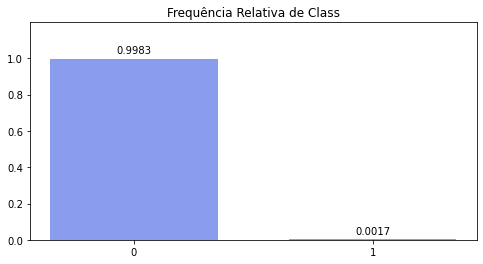

In [8]:
preditiva.cria_grafico_var_qualitativa(preditiva.tabela_bivariada(df, 'Class'))

In [9]:
preditiva.tabela_bivariada(df, 'Class')

,Class,Freq_Relativa,Freq_Acumulada
0,284315,0.9983,0.9983
1,492,0.0017,1.0000


### Relatórios Pandas Profiling e SweetViz

In [10]:
#perfil_pp, perfil_sv = preditiva.gera_relatorios_aed(df=df,
#                                                     target_feat='Class')
sns.reset_defaults()

## Desenvolvimento dos Modelos

### Definição do *Target* e das *Features*

In [11]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
# Target (variável resposta)
y_var = 'Class'
y = df[y_var]

# Features (variáveis explicativas)
# Variáveis Numéricas
x_var_num = [
    'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
    'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
    'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
    'Amount'
    ]
x_num = df[x_var_num].to_numpy()

# Variáveis Categóricas / Qualitativas
# Não existem variáveis categóricas nesse dataset
# x_var_cat = []
# x_cat = df[x_var_cat]

### Pré-processamento

In [ ]:
# Criação das variáveis dummies para variáveis categóricas
# x_cat_enc = OneHotEncoder()
# x_cat = x_cat_enc.fit_transform(x_cat).toarray()

# Unificação da base de dados
# x = np.concatenate([x_num, x_cat], axis=1)

### Divisão das bases em Treino e Teste

In [13]:
# Divisão em treino e teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_num, y, 
                                                    test_size=0.30,
                                                    random_state=42)

### Criação de modelo baseline

In [14]:
# Treinamento de um modelo Gradient Boosting
modelo_base = GradientBoostingClassifier(n_estimators=10,
                                         subsample=1,                                         
                                         random_state=42)
modelo_base.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=10, random_state=42, subsample=1)

In [15]:
preditiva.calcula_desempenho(modelo_base,
                             x_train, y_train,
                             x_test, y_test)

,Treino,Teste,Variação
Acurácia,0.998470,0.998607,0.00
AUROC,0.319057,0.267412,-0.16
KS,0.634525,0.690696,0.09
Precision,0.822785,0.814815,-0.01
Recall,0.182584,0.161765,-0.11
F1,0.298851,0.269939,-0.10


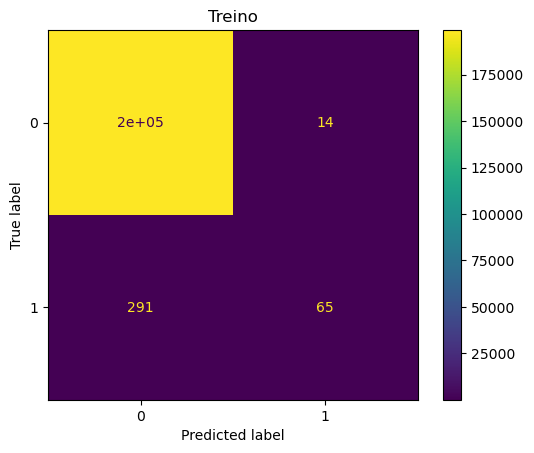

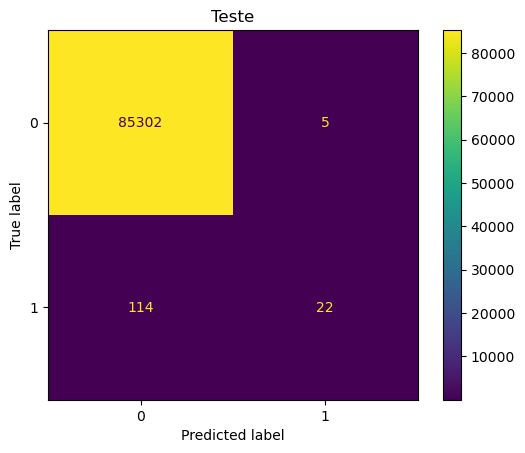

In [16]:
preditiva.matriz_confusao(modelo_base,
                          x_train, y_train,
                          x_test, y_test)

## Random Oversampling

In [21]:
# IMPORTANTE: a reamostragem deve ser feita APENAS na base de Treino
rnd_over = imblearn.over_sampling.RandomOverSampler(sampling_strategy=0.2,
                                                    random_state=42)
x_train_over, y_train_over = rnd_over.fit_resample(x_train, y_train)

print('Shape do y_train: ', y_train.shape)
print('Shape do y_train_over: ', y_train_over.shape)

Shape do y_train:  (199364,)
Shape do y_train_over:  (238809,)


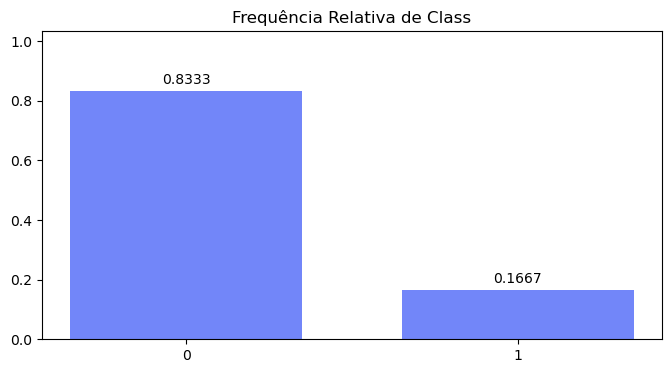

In [22]:
preditiva.cria_grafico_var_qualitativa(preditiva.tabela_bivariada(pd.DataFrame(y_train_over), 
                                                                  'Class'))

In [23]:
# Treinamento de um modelo Gradient Boosting com Random Oversampling
modelo_ro = GradientBoostingClassifier(n_estimators=10,
                                       subsample=1,   
                                       random_state=42)
modelo_ro.fit(x_train_over, y_train_over)

preditiva.calcula_desempenho(modelo_ro,
                             x_train_over, y_train_over,
                             x_test, y_test)

,Treino,Teste,Variação
Acurácia,0.973305,0.999181,0.03
AUROC,0.976552,0.968076,-0.01
KS,0.890455,0.911346,0.02
Precision,0.996259,0.701220,-0.30
Recall,0.842994,0.845588,0.00
F1,0.913241,0.766667,-0.16


In [24]:
preditiva.calcula_desempenho(modelo_base,
                             x_train, y_train,
                             x_test, y_test)

,Treino,Teste,Variação
Acurácia,0.998470,0.998607,0.00
AUROC,0.319057,0.267412,-0.16
KS,0.634525,0.690696,0.09
Precision,0.822785,0.814815,-0.01
Recall,0.182584,0.161765,-0.11
F1,0.298851,0.269939,-0.10


## SMOTE Oversampling

In [25]:
over_smote = imblearn.over_sampling.SMOTE(sampling_strategy=0.2,
                                          random_state=42, 
                                          n_jobs=4)
x_train_over_smote, y_train_over_smote = over_smote.fit_resample(x_train, y_train)

print('Shape do y_train: ', y_train.shape)
print('Shape do y_train_over: ', y_train_over_smote.shape)

Shape do y_train:  (199364,)
Shape do y_train_over:  (238809,)


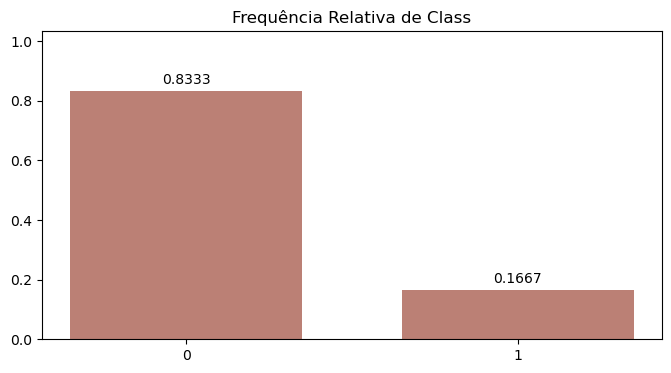

In [26]:
preditiva.cria_grafico_var_qualitativa(preditiva.tabela_bivariada(pd.DataFrame(y_train_over_smote), 
                                                                  'Class'))

In [27]:
0.1667/0.8333

0.20004800192007677

In [28]:
# Treinamento de um modelo Gradient Boosting com Oversampling
modelo_smote = GradientBoostingClassifier(n_estimators=10,
                                          subsample=1,   
                                          random_state=42)
modelo_smote.fit(x_train_over_smote, y_train_over_smote)

preditiva.calcula_desempenho(modelo_smote, 
                             x_train_over_smote, y_train_over_smote,
                             x_test, y_test)

,Treino,Teste,Variação
Acurácia,0.976538,0.999017,0.02
AUROC,0.980475,0.967085,-0.01
KS,0.903938,0.913784,0.01
Precision,0.995968,0.644444,-0.35
Recall,0.862717,0.852941,-0.01
F1,0.924566,0.734177,-0.21


In [29]:
preditiva.calcula_desempenho(modelo_base,
                             x_train, y_train,
                             x_test, y_test)

,Treino,Teste,Variação
Acurácia,0.998470,0.998607,0.00
AUROC,0.319057,0.267412,-0.16
KS,0.634525,0.690696,0.09
Precision,0.822785,0.814815,-0.01
Recall,0.182584,0.161765,-0.11
F1,0.298851,0.269939,-0.10


## Random Undersampling

In [30]:
# IMPORTANTE: a reamostragem deve ser feita APENAS na base de Treino
rnd_under = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=0.2,
                                                       random_state=42)
x_train_under, y_train_under = rnd_under.fit_resample(x_train, y_train)

print('Shape do y_train: ', y_train.shape)
print('Shape do y_train_under: ', y_train_under.shape)

Shape do y_train:  (199364,)
Shape do y_train_under:  (2136,)


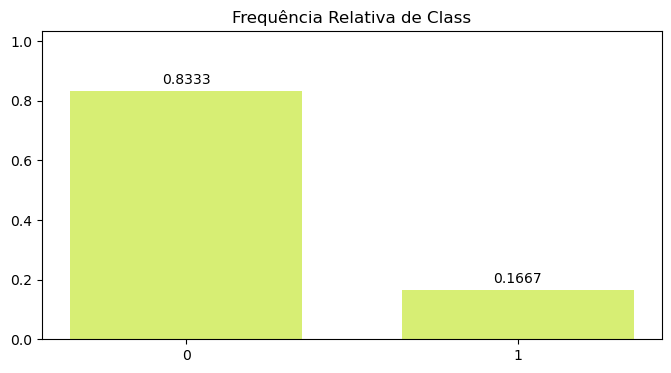

In [31]:
preditiva.cria_grafico_var_qualitativa(preditiva.tabela_bivariada(pd.DataFrame(y_train_under), 
                                                                  'Class'))

In [34]:
preditiva.tabela_bivariada(pd.DataFrame(y_train), 'Class')

,Class,Freq_Relativa,Freq_Acumulada
0,199008,0.9982,0.9982
1,356,0.0018,1.0000


In [33]:
preditiva.tabela_bivariada(pd.DataFrame(y_train_under), 'Class')

,Class,Freq_Relativa,Freq_Acumulada
0,1780,0.8333,0.8333
1,356,0.1667,1.0000


In [35]:
# Treinamento de um modelo Gradient Boosting com Random Oversampling
modelo_ru = GradientBoostingClassifier(n_estimators=10,
                                       subsample=1,   
                                       random_state=42)
modelo_ru.fit(x_train_under, y_train_under)

preditiva.calcula_desempenho(modelo_ru,
                             x_train_under, y_train_under,
                             x_test, y_test)

,Treino,Teste,Variação
Acurácia,0.972846,0.998982,0.03
AUROC,0.974763,0.967548,-0.01
KS,0.890449,0.905939,0.02
Precision,1.000000,0.631016,-0.37
Recall,0.837079,0.867647,0.04
F1,0.911315,0.730650,-0.20


In [36]:
preditiva.calcula_desempenho(modelo_base,
                             x_train, y_train,
                             x_test, y_test)

,Treino,Teste,Variação
Acurácia,0.998470,0.998607,0.00
AUROC,0.319057,0.267412,-0.16
KS,0.634525,0.690696,0.09
Precision,0.822785,0.814815,-0.01
Recall,0.182584,0.161765,-0.11
F1,0.298851,0.269939,-0.10


## Tomek Link Undersampling

In [44]:
# IMPORTANTE: a reamostragem deve ser feita APENAS na base de Treino
log_message('Iniciando Tomek Link Undersampling...')
under_tomek = imblearn.under_sampling.TomekLinks(sampling_strategy='auto',
                                                 n_jobs=4)
x_train_under_tomek, y_train_under_tomek = under_tomek.fit_resample(x_train, y_train)

log_message('Concluída preparação Tomek Link Undersampling!')
print('Shape do y_train: ', y_train.shape)
print('Shape do y_train_tomek: ', y_train_under_tomek.shape)

11:59:32 -  Iniciando Tomek Link Undersampling...
12:19:23 -  Concluída preparação Tomek Link Undersampling!
Shape do y_train:  (199364,)
Shape do y_train_tomek:  (199341,)


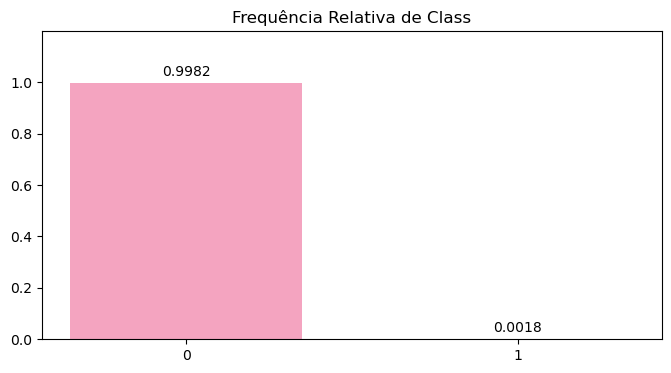

In [45]:
preditiva.cria_grafico_var_qualitativa(preditiva.tabela_bivariada(pd.DataFrame(y_train_under_tomek), 
                                                                  'Class'))

In [46]:
# Treinamento de um modelo Gradient Boosting com Random Oversampling
modelo_tomek = GradientBoostingClassifier(n_estimators=10,
                                          subsample=1,   
                                          random_state=42)
modelo_tomek.fit(x_train_under_tomek, y_train_under_tomek)

preditiva.calcula_desempenho(modelo_tomek,
                             x_train_under_tomek, y_train_under_tomek,
                             x_test, y_test)

,Treino,Teste,Variação
Acurácia,0.999413,0.999286,-0.00
AUROC,0.853843,0.834406,-0.02
KS,0.766000,0.763792,-0.00
Precision,0.897010,0.786260,-0.12
Recall,0.758427,0.757353,-0.00
F1,0.821918,0.771536,-0.06


In [47]:
preditiva.calcula_desempenho(modelo_base, x_train, y_train, x_test, y_test)

,Treino,Teste,Variação
Acurácia,0.998470,0.998607,0.00
AUROC,0.319057,0.267412,-0.16
KS,0.634525,0.690696,0.09
Precision,0.822785,0.814815,-0.01
Recall,0.182584,0.161765,-0.11
F1,0.298851,0.269939,-0.10


## Combinação SMOTE + Tomek

In [48]:
# IMPORTANTE: a reamostragem deve ser feita APENAS na base de Treino
log_message('Iniciando SMOTE + Tomek Link Undersampling...')
smote_tomek = imblearn.combine.SMOTETomek(sampling_strategy='auto', 
                                          random_state=42,
                                          smote=over_smote,
                                          tomek=under_tomek,
                                          n_jobs=-1)
x_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(x_train, y_train)
log_message('Concluída preparação SMOTE + Tomek Link Undersampling!')

print('Shape do y_train: ', y_train.shape)
print('Shape do y_train_smote_tomek: ', y_train_smote_tomek.shape)

12:27:55 -  Iniciando SMOTE + Tomek Link Undersampling...
12:56:51 -  Concluída preparação SMOTE + Tomek Link Undersampling!
Shape do y_train:  (199364,)
Shape do y_train_smote_tomek:  (238808,)


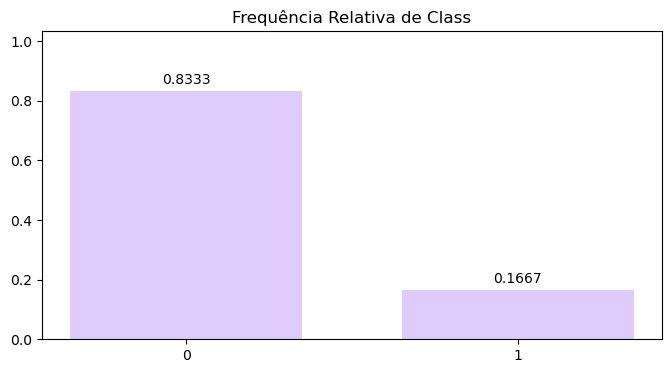

In [49]:
preditiva.cria_grafico_var_qualitativa(preditiva.tabela_bivariada(pd.DataFrame(y_train_smote_tomek), 
                                                                  'Class'))

In [50]:
# Treinamento de um modelo Gradient Boosting com Random Oversampling
modelo_smote_tomek = GradientBoostingClassifier(n_estimators=10,
                                                subsample=1,   
                                                random_state=42)
modelo_smote_tomek.fit(x_train_smote_tomek, y_train_smote_tomek)

preditiva.calcula_desempenho(modelo_smote_tomek, 
                             x_train_smote_tomek, y_train_smote_tomek,
                             x_test, y_test)

,Treino,Teste,Variação
Acurácia,0.976538,0.999017,0.02
AUROC,0.980475,0.967085,-0.01
KS,0.903937,0.913784,0.01
Precision,0.995968,0.644444,-0.35
Recall,0.862717,0.852941,-0.01
F1,0.924566,0.734177,-0.21


In [52]:
preditiva.calcula_desempenho(modelo_ro, 
                             x_train, y_train,
                             x_test, y_test)

,Treino,Teste,Variação
Acurácia,0.999087,0.999181,0.00
AUROC,0.976776,0.968076,-0.01
KS,0.891399,0.911346,0.02
Precision,0.704225,0.701220,-0.00
Recall,0.842697,0.845588,0.00
F1,0.767263,0.766667,-0.00


In [51]:
preditiva.calcula_desempenho(modelo_base, 
                             x_train, y_train,
                             x_test, y_test)

,Treino,Teste,Variação
Acurácia,0.998470,0.998607,0.00
AUROC,0.319057,0.267412,-0.16
KS,0.634525,0.690696,0.09
Precision,0.822785,0.814815,-0.01
Recall,0.182584,0.161765,-0.11
F1,0.298851,0.269939,-0.10
